In [36]:
# parse
import re
loss_regex = r"TrainLoss: (\d+\.\d+)"
tp_regex = r": (\d+\.\d) img\/sec"

def parse(file, regex):
    nums = []
    for line in open(file, "r").readlines():
        matches = re.search(regex, line)
        if matches:
            nums.append(float(matches.group(1)))
    return nums

def parse_loss(file):
    return parse(file, loss_regex)

def parse_tp(file):
    return parse(file, tp_regex)

In [37]:
sketch = parse_loss("bench-sketch")
allreduce = parse_loss("bench-allreduce")

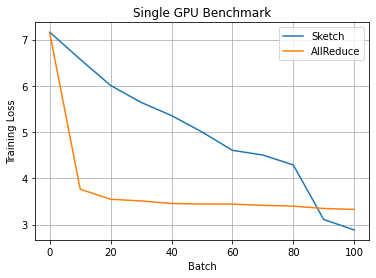

In [38]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0, 110, 10)
plt.plot(t, sketch, label="Sketch")
plt.plot(t, allreduce, label="AllReduce")

plt.xlabel("Batch")
plt.ylabel("Training Loss")
plt.grid(True)
plt.legend()
plt.title("Single GPU Benchmark")

plt.show()